In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive    
 
drive.mount('/content/drive')

Mounted at /content/drive


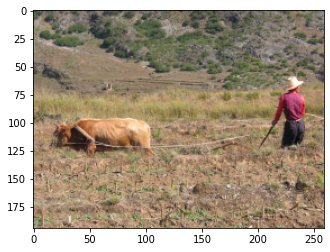

In [3]:
img=cv2.imread('/content/drive/MyDrive/hi.png')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
def normm(img1,img2):
    if (img1.std()==0 or img2.std()==0):
        return 0
    up=np.mean((img1-img1.mean())*(img2-img2.mean()))
    down=(img1.std()*img2.std())
    return up/down
def corr_match(img1,img2,xx):
    mp1=[]
    mp2=[]
    d={}
    l=0
    x,y=xx[0],xx[1]
    #img2=cv2.resize(img2,(img1.shape[1],img1.shape[0]))
    for i in range((img1.shape[0]-x)):
        for j in range((img1.shape[1]-y)):
            img=img1[i:i+x,j:j+y].copy()
            corr=0
            mp1.append((i,j))
            mp2.append((0,0))
            for ii in range((img2.shape[0]-x)):
                for jj in range((img2.shape[1]-y)):
                    temp=img2[ii:ii+x,jj:jj+y].copy()
                    corr_temp=normm(img,temp)
                    if(corr_temp>corr):
                        mp2[l]=(ii,jj)
                        corr=corr_temp
            d[i,j]=mp2[l]
            l=l+1
    return d
def corr_match1(img1,img2,xx):
    mp1=[]
    mp2=[]
    d={}
    l=0
    x,y=xx[0],xx[1]
    #img2=cv2.resize(img2,(img1.shape[1],img1.shape[0]))
    for i in range((img1.shape[0]-x)):
        for j in range((img1.shape[1]-y)):
            img=img1[i:i+x,j:j+y].copy()
            corr=0
            mp1.append((i,j))
            mp2.append((0,0))
            for ii in range((img2.shape[0]-x)):
                for jj in range((img2.shape[1]-y)):
                    temp=img2[ii:ii+x,jj:jj+y].copy()
                    corr_temp=normm(img,temp)
                    if(corr_temp>corr):
                        mp2[l]=(ii,jj)
                        corr=corr_temp
            d[i,j]=mp2[l]
            l=l+1
    return d
def corr_match2(img1,img2,xx):
    mp1=[]
    mp2=[]
    d={}
    l=0
    x,y=xx[0],xx[1]
    #img2=cv2.resize(img2,(img1.shape[1],img1.shape[0]))
    for i in range((img1.shape[0]-x)):
        for j in range((img1.shape[1]-y)):
            img=img1[i:i+x,j:j+y].copy()
            corr=0
            mp1.append((i,j))
            mp2.append((0,0))
            for ii in range((img2.shape[0]-x)):
                for jj in range((img2.shape[1]-y)):
                    temp=img2[ii:ii+x,jj:jj+y].copy()
                    corr_temp=normm(img,temp)
                    if(corr_temp>corr):
                        mp2[l]=(ii,jj)
                        corr=corr_temp
            d[mp2[l]]=(i,j)
            l=l+1
    return d

In [4]:
from numpy.linalg import norm
def PP(a,l=5,s=5):
    x = np.arange(0,a.shape[1]-s+1,1)
    y = np.arange(0,a.shape[0]-s+1,1)
    x,y = np.meshgrid(x,y)
    return x.flatten(),y.flatten()
def patches(a,x,y,l=5):
    g = len(x) ; lis = np.asarray([])
    for i in range(g):
        if i==0:
            lis=a[y[i]:y[i]+l,x[i]:x[i]+l].flatten()
        if i!=0:
            lis=np.vstack((lis,a[y[i]:y[i]+l,x[i]:x[i]+l].flatten()))
    return lis
def NCC_best_patch1(a,b,l=5,s=5):
    
    x1,y1 = PP(a,l,s) ; lis1 = patches(a,x1,y1,l)
    x2,y2 = PP(b,l,s) ; lis2 = patches(b,x2,y2,l)    
    d={}
    lis1 = lis1-np.mean(lis1,axis=1).reshape(-1,1) ; lis1 = lis1/(norm(lis1,axis=1).reshape(-1,1)+0.1)
    #lis2 = lis2-np.mean(lis2,axis=1).reshape(-1,1) ; lis2 = lis2/(norm(lis2,axis=1).reshape(-1,1)+0.1)
    ans=np.argmax(lis1@lis2.T,axis=1)
    #ans=np.append(ans,np.argmax(lis1[len(lis1)//2:]@lis2.T,axis=1),axis=0)
    #ans = np.argmax(arr,axis=1)
    for i in range(len(x1)):
        d[(y1[i],x1[i])]=(y2[ans[i]],x2[ans[i]])
    return d
def NCC_best_patch2(a,b,l=5,s=5):
    
    x1,y1 = PP(a,l,s) ; lis1 = patches(a,x1,y1,l)
    x2,y2 = PP(b,l,s) ; lis2 = patches(b,x2,y2,l)    
    d={}
    lis1 = lis1-np.mean(lis1,axis=1).reshape(-1,1) ; lis1 = lis1/(norm(lis1,axis=1).reshape(-1,1)+0.1)
    #lis2 = lis2-np.mean(lis2,axis=1).reshape(-1,1) ; lis2 = lis2/(norm(lis2,axis=1).reshape(-1,1)+0.1)
    ans=np.argmax(lis1@lis2.T,axis=1)
    #ans=np.append(ans,np.argmax(lis1[len(lis1)//2:]@lis2.T,axis=1),axis=0)
    #ans = np.argmax(arr,axis=1)
    for i in range(len(x1)):
        d[(y2[ans[i]],x2[ans[i]])]=(y1[i],x1[i])
    return d

In [11]:
def NCC_best_patch11(a,b,l=5,s=5):
    a=cv2.cvtColor(a,cv2.COLOR_RGB2Lab)
    b=cv2.cvtColor(b,cv2.COLOR_RGB2Lab)
    x1,y1 = PP(a,l,s) ; lis1 = patches(a,x1,y1,l)
    x2,y2 = PP(b,l,s) ; lis2 = patches(b,x2,y2,l)
    #lis1 = lis1-np.mean(lis1,axis=1).reshape(-1,1)
    #lis2 = lis2-np.mean(lis2,axis=1).reshape(-1,1) 
    #print(lis1.shape,lis2.shape)   
    d={}
    ans=[]
    ans1=[]
    for i in lis1:
        if(len(ans)%1000==0):
          print('*',end="")
        here=np.sum((lis2-i)**2,axis=1)
        ans.append(np.argmin(here))
        ans1.append(np.min(here)/here.shape)
    for i in range(len(x1)):
        d[(y1[i],x1[i])]=(y2[ans[i]],x2[ans[i]])
    ans1=np.array(ans1)
    print(ans1)
    return d,np.sum(ans1)/len(ans)
def NCC_best_patch21(a,b,l=5,s=5):
    a=cv2.cvtColor(a,cv2.COLOR_RGB2Lab)
    b=cv2.cvtColor(b,cv2.COLOR_RGB2Lab)
    x1,y1 = PP(a,l,s) ; lis1 = patches(a,x1,y1,l)
    x2,y2 = PP(b,l,s) ; lis2 = patches(b,x2,y2,l)    
    #lis1 = lis1-np.mean(lis1,axis=1).reshape(-1,1)
    #lis2 = lis2-np.mean(lis2,axis=1).reshape(-1,1)
    d={}
    ans=[]
    ans1=[]    
    for i in lis1:
        if(len(ans)%1000==0):
          print('*',end="")
        here=np.sum((lis2-i)**2,axis=1)
        ans.append(np.argmin(here))
        ans1.append(np.min(here)/here.shape)
    for i in range(len(x1)):
        d[(y2[ans[i]],x2[ans[i]])]=(y1[i],x1[i])
    ans1=np.array(ans1)
    print(ans1)
    return d,np.sum(ans1)/len(ans)

In [ ]:
img1=cv2.imread('./hi.png')
img1=cv2.resize(img1,(30,30))
img2=cv2.resize(img1,(30,30))
d1=corr_match1(img1,img2,[7,7])
d2=NCC_best_patch1(img1,img2,7,7)
print(len(d1),len(d2))

529 576


In [ ]:
print(d1,'\n',d2)

{(0, 0): (0, 0), (0, 1): (0, 1), (0, 2): (0, 2), (0, 3): (0, 3), (0, 4): (0, 4), (0, 5): (0, 5), (0, 6): (0, 6), (0, 7): (0, 7), (0, 8): (0, 8), (0, 9): (0, 9), (0, 10): (0, 10), (0, 11): (0, 11), (0, 12): (0, 12), (0, 13): (0, 13), (0, 14): (0, 14), (0, 15): (0, 15), (0, 16): (0, 16), (0, 17): (0, 17), (0, 18): (0, 18), (0, 19): (0, 19), (0, 20): (0, 20), (0, 21): (0, 21), (0, 22): (0, 22), (1, 0): (1, 0), (1, 1): (1, 1), (1, 2): (1, 2), (1, 3): (1, 3), (1, 4): (1, 4), (1, 5): (1, 5), (1, 6): (1, 6), (1, 7): (1, 7), (1, 8): (1, 8), (1, 9): (1, 9), (1, 10): (1, 10), (1, 11): (1, 11), (1, 12): (1, 12), (1, 13): (1, 13), (1, 14): (1, 14), (1, 15): (1, 15), (1, 16): (1, 16), (1, 17): (1, 17), (1, 18): (1, 18), (1, 19): (1, 19), (1, 20): (1, 20), (1, 21): (1, 21), (1, 22): (1, 22), (2, 0): (2, 0), (2, 1): (2, 1), (2, 2): (2, 2), (2, 3): (2, 3), (2, 4): (2, 4), (2, 5): (2, 5), (2, 6): (2, 6), (2, 7): (2, 7), (2, 8): (2, 8), (2, 9): (2, 9), (2, 10): (2, 10), (2, 11): (2, 11), (2, 12): (2, 12

In [ ]:
#print(match)

********************************************[[0.00807018]
 [0.01944272]
 [0.02889577]
 ...
 [0.09789474]
 [0.10336429]
 [0.09669763]]
0.05219723267007252
*************************************************[[0.00897612]
 [0.02162534]
 [0.03213958]
 ...
 [0.1088843 ]
 [0.11570248]
 [0.11260331]]
0.061540882604068654


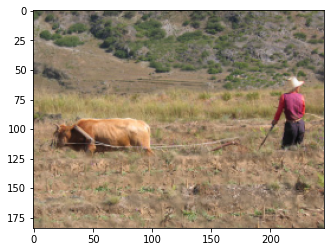

****************************************[[0.00948118]
 [0.01496786]
 [0.03303489]
 ...
 [0.006382  ]
 [0.00911387]
 [0.00927456]]
0.04467256353377288
********************************************[[0.01050089]
 [0.01657768]
 [0.03658785]
 ...
 [0.0070684 ]
 [0.01009408]
 [0.01027206]]
0.05317672600073265


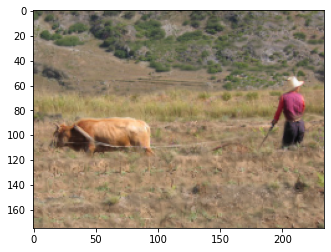

************************************[[0.01133994]
 [0.02723112]
 [0.0466565 ]
 ...
 [0.11779812]
 [0.11238241]
 [0.08324434]]
0.040562090718941984
****************************************[[0.01262884]
 [0.0303262 ]
 [0.05195945]
 ...
 [0.13076226]
 [0.12515574]
 [0.09270586]]
0.04880299064143753


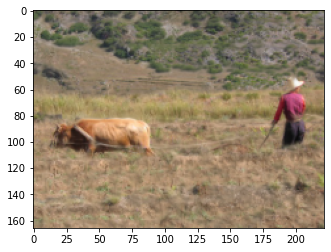

********************************[[0.01285536]
 [0.03072262]
 [0.04584324]
 ...
 [0.01404463]
 [0.01613999]
 [0.01438441]]
0.03768955058307834
************************************[[0.0142418 ]
 [0.03403601]
 [0.05078738]
 ...
 [0.01555932]
 [0.01788067]
 [0.01593576]]
0.044709076073108624


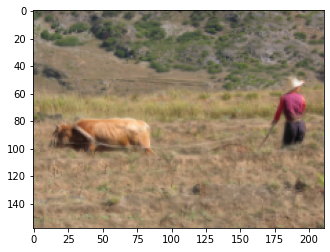

*****************************[[0.01835121]
 [0.04118828]
 [0.04733672]
 ...
 [0.07528703]
 [0.08429011]
 [0.08237656]]
0.03848740584801894
********************************[[0.02044311]
 [0.04588342]
 [0.05273274]
 ...
 [0.09389852]
 [0.13272295]
 [0.09176684]]
0.046500168345198795


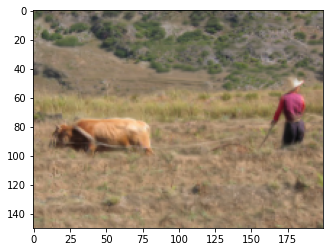

**************************[[0.02467151]
 [0.04504473]
 [0.04867906]
 ...
 [0.05004193]
 [0.05874336]
 [0.0723721 ]]
0.03958936533684093
*****************************[[0.02750506]
 [0.05021817]
 [0.05426991]
 ...
 [0.1287985 ]
 [0.14905719]
 [0.16756272]]
0.04746737348579912


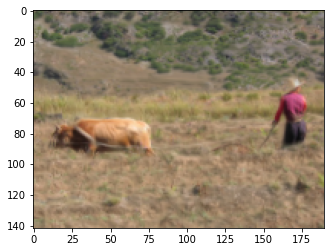

************************[[0.03027115]
 [0.04862085]
 [0.04975066]
 ...
 [0.02945302]
 [0.0317516 ]
 [0.05781518]]
0.043997953786551317
**************************[[0.03370056]
 [0.05412908]
 [0.05538688]
 ...
 [0.03534872]
 [0.06436502]
 [0.18138446]]
0.05265398422303179


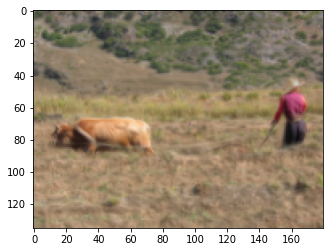

*********************[[0.03673664]
 [0.05226405]
 [0.05174358]
 ...
 [0.06913602]
 [0.06362769]
 [0.06748786]]
0.04778448534307446
************************[[0.04090207]
 [0.05819007]
 [0.05761059]
 ...
 [0.07697508]
 [0.07084219]
 [0.07514004]]
0.05686164453904306


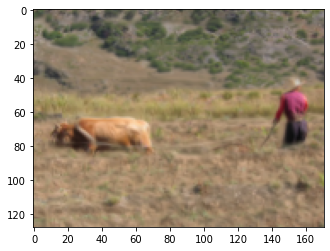

*******************[[0.0437995 ]
 [0.05582384]
 [0.05167085]
 ...
 [0.04746958]
 [0.04906316]
 [0.05495461]]
0.04746545347684875
*********************[[0.04864836]
 [0.06200386]
 [0.05739112]
 ...
 [0.05449474]
 [0.0610384 ]
 [0.17324608]]
0.05675499047927772


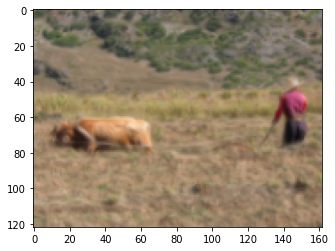

*****************[[0.05251019]
 [0.0620575 ]
 [0.05497747]
 ...
 [0.00590002]
 [0.00364729]
 [0.00262819]]
0.05031223820251122
*******************[[0.05827381]
 [0.06886905]
 [0.0610119 ]
 ...
 [0.00654762]
 [0.00404762]
 [0.00291667]]
0.05988645332086922


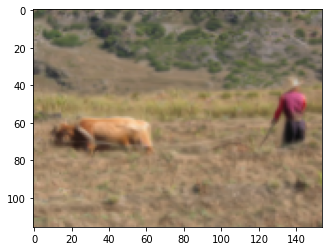

****************[[0.06208333]
 [0.06714286]
 [0.0572619 ]
 ...
 [0.08035714]
 [0.11232143]
 [0.11410714]]
0.056836395732887894
*****************[[0.06929312]
 [0.07494021]
 [0.06391177]
 ...
 [0.1253654 ]
 [0.16004518]
 [0.12735849]]
0.06750211172696556


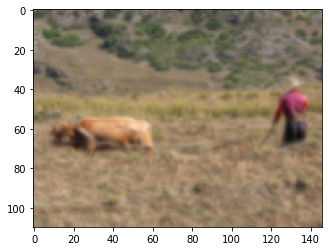

**************[[0.07068828]
 [0.07241563]
 [0.06138719]
 ...
 [0.03481265]
 [0.03441403]
 [0.0513553 ]]
0.06409945276129173
****************[[0.07881481]
 [0.08074074]
 [0.06844444]
 ...
 [0.09740741]
 [0.13896296]
 [0.17755556]]
0.076516230155215


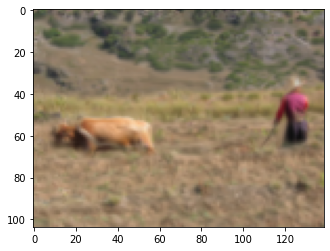

*************[[0.07414815]
 [0.074     ]
 [0.06288889]
 ...
 [0.01103704]
 [0.01037037]
 [0.01081481]]
0.07142743664717349
**************[[0.08231908]
 [0.08215461]
 [0.06981908]
 ...
 [0.01225329]
 [0.01151316]
 [0.01200658]]
0.08479627192982456


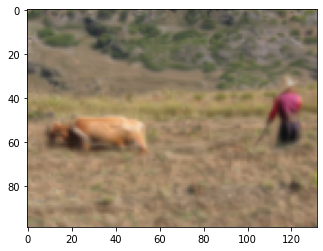

***********[[0.08059211]
 [0.07738487]
 [0.06603618]
 ...
 [0.02746711]
 [0.03889803]
 [0.08610197]]
0.07681869532647045
*************[[0.08999082]
 [0.08640955]
 [0.07373737]
 ...
 [0.04343434]
 [0.09614325]
 [0.1030303 ]]
0.09162579744816586


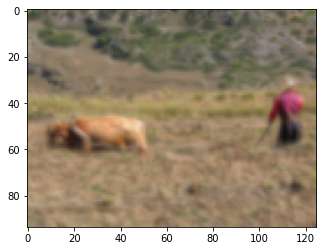

**********[[0.0892562 ]
 [0.08613407]
 [0.07318641]
 ...
 [0.04168962]
 [0.05665748]
 [0.07842057]]
0.0832725957552742
***********[[0.09943734]
 [0.09595908]
 [0.08153453]
 ...
 [0.04644501]
 [0.0631202 ]
 [0.08736573]]
0.09956843487185268


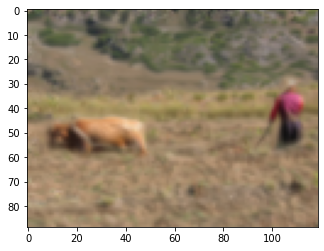

*********[[0.09626598]
 [0.09176471]
 [0.07754476]
 ...
 [0.04542199]
 [0.04040921]
 [0.05800512]]
0.08736746695309779
**********[[0.10658059]
 [0.10159701]
 [0.08585344]
 ...
 [0.05028882]
 [0.04473893]
 [0.06422018]]
0.10384848350544401


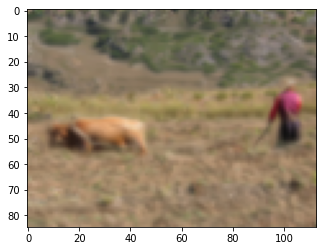

********[[0.10001133]
 [0.09276249]
 [0.07905765]
 ...
 [0.04553177]
 [0.05878355]
 [0.07611281]]
0.09694086921603919
*********[[0.11133527]
 [0.10326567]
 [0.08800908]
 ...
 [0.05484806]
 [0.06543941]
 [0.0847308 ]]
0.11573453383375891


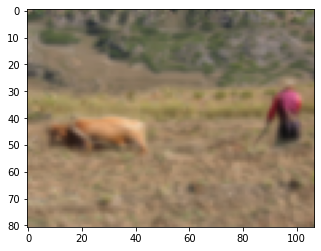

********[[0.1059135 ]
 [0.09595259]
 [0.08107427]
 ...
 [0.01021309]
 [0.0191653 ]
 [0.01929139]]
0.11399970679455848
********[[0.11741683]
 [0.10637406]
 [0.08987979]
 ...
 [0.01132234]
 [0.02124685]
 [0.02138664]]
0.1348129398279901


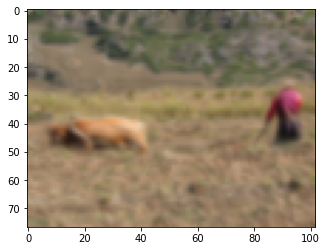

*******[[0.11196533]
 [0.09938496]
 [0.08247134]
 ...
 [0.02963377]
 [0.03131115]
 [0.03997763]]
0.12958639750289377
********[[0.12482468]
 [0.11079944]
 [0.09194328]
 ...
 [0.03303724]
 [0.03490728]
 [0.04456911]]
0.15444601761753457


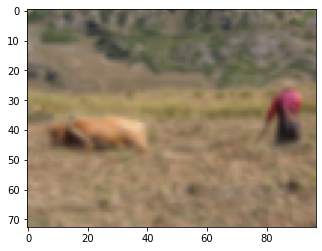

******[[0.114072  ]
 [0.10020259]
 [0.08274895]
 ...
 [0.12513636]
 [0.14539504]
 [0.17812062]]
0.13223912988990127
*******[[0.12797203]
 [0.11241259]
 [0.09283217]
 ...
 [0.14038462]
 [0.16311189]
 [0.19982517]]
0.15848203144837086


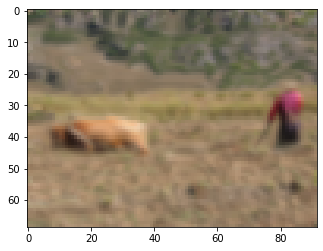

In [10]:
S=cv2.imread('/content/drive/MyDrive/hi.png')
#S=cv2.resize(S,(150,150))
S=cv2.cvtColor(S,cv2.COLOR_BGR2RGB)
T=S.copy()
#window size=7*7 always
for _ in range(20):
    T=cv2.resize(T,None,fx=0.95,fy=0.95)
    out=T.copy()
    match1,me1=NCC_best_patch11(T,S)
    print(me1)
    match2,me2=NCC_best_patch21(S,T)
    print(me2)
    for i in range(T.shape[0]):
        for j in range(T.shape[1]):
            cnt1=0
            sum1=np.array([0,0,0])
            cnt2=0
            sum2=np.array([0,0,0])
            for x in range(5): 
                for y in range(5):
                    try :
                        here=match1[(i-x,j-y)]
                        sum1=sum1+S[here[0]+x,here[1]+y]
                        cnt1=cnt1+1
                    except :
                        continue
            for x in range(5):
                for y in range(5):
                    try :
                        here=match2[(i-x,j-y)]
                        sum2=sum2+S[here[0]+x,here[1]+y]
                        cnt2=cnt2+1
                    except :
                        continue
            out[i,j]=np.array((sum1+sum2)/(cnt1+cnt2),int)
    T=out.copy()
    plt.imshow(T)
    plt.show()
    S=T.copy()

In [ ]:
a=np.array([[1,2,3],[4,5,6]])
print(a.shape)
for i in a :
  print(i)
b=np.array([1,2,3])
aa=np.sum(a-b,axis=1)
np.argmax(aa)

(2, 3)
[1 2 3]
[4 5 6]


1